<a href="https://colab.research.google.com/github/hyunicecream/Natural-Language-Processing-NLP-/blob/main/7_13_%ED%99%94(Popcorn_MI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pickle
import nltk
from nltk.stem import PorterStemmer
from gensim.models import word2vec

nltk.download('punkt')

with open('/content/drive/MyDrive/머신러닝/popcorn.pkl', 'rb') as f:
    xd_train, yd_train, xd_test, yd_test = pickle.load(f)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
xd_train[0]

In [ ]:
# 문장의 문자열을 token으로 분리한다.
sent_tok = [nltk.word_tokenize(sent) for sent in xd_train + xd_test]
#sent_tok[0]
len(sent_tok)

25000

In [ ]:
from collections import defaultdict
whole_word_counter = defaultdict(int)
for words in sent_tok:
  for word in words:
    whole_word_counter[word] += 1
len(whole_word_counter)

19577

In [ ]:
whole_counter = defaultdict(int)
for k, v in whole_word_counter.items():
  if v >= 5:
    whole_counter[k] = v
whole_counter

In [ ]:
len(whole_counter)

19577

In [ ]:
for words in sent_tok:
  for word in words:
    if whole_counter[word] == 0:
      words.remove(word)
len(whole_counter)

19577

In [ ]:
sentence_word_count = []
for words in sent_tok:
  word_counter = defaultdict(int)
  for word in words:
    if whole_counter[word] == 0:
      continue;
    word_counter[word] +=1
  sentence_word_count.append(word_counter)

len(sentence_word_count)

len(xd_train)

17500

(array([8716.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8784.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

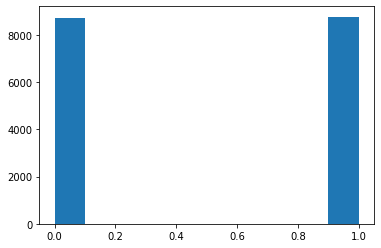

In [ ]:
plt.hist(yd_train)

In [ ]:
zero_count = 0
one_count = 0
for idx, words in enumerate(sent_tok):
  if yd_train[idx] == 0:
    zero_count += len(words)
  if yd_train[idx] == 1:
    one_count += len(words)

zero_count, one_count

IndexError: ignored

In [ ]:
import math
from tqdm import tqdm
D = []
N = zero_count+one_count
mutual_informations = defaultdict(float)
## 각각의 단어마다
for word in tqdm(whole_counter):
  # y=0 일 때
  sum_word_in_zero = 0
  sum_word_in_one = 0
  for idx, counter in enumerate(sentence_word_count):
    if yd_train == 0:
      sum_word_in_zero += counter[word]
    if yd_train == 1:
      sum_word_in_one += counter[word]
  a = sum_word_in_zero+1
  b = sum_word_in_one+1
  # y=0 먼저
  # p(word|y=0)*log(p(word|y=0)/(p(word)*p(y=0)))
  mutual_information = (a/zero_count)*math.log((a/zero_count)/((a/N)*(zero_count/N)))
  # p(word|y=1)*log(p(word|y=1)/(p(word)*p(y=1)))
  mutual_information = (b/one_count)*math.log((b/one_count)/((b/N)*(one_count/N)))
  mutual_informations[word] = mutual_information

len(mutual_informations)

len(whole_counter)

#상위 10000개만 사용
top_10000 = sorted(mutual_informations.items(), key=lambda item: item[1], reverse=True)[:10000]

top_10000[:50]


  0%|          | 0/19577 [00:00<?, ?it/s]


ZeroDivisionError: ignored